# This notebooks calls the edgefitting_2D.py routine and makes some pictures afterwards

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import AdvancedBraggEdgeFitting_v2
from PIL import Image

import tifffile
from tifffile import TiffFile

from skimage import io

import os, fnmatch
from os import listdir

from TOF_routines import tof2l
from TOF_routines import find_nearest

from astropy.io import fits
import edgefitting_2D

import ipywe.fileselector

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
#TODO : remove the unused libs

%matplotlib notebook

### Get the path data 

In [2]:
fsel_data= ipywe.fileselector.FileSelectorPanel(instruction='select directory for data' , start_dir='.', type='directory')
fsel_data.show()
#ex. '/media/carminati_c/Data2/LSP_Manuel/sample_binned_spotCleaned/'

### Get the path OB 

In [3]:
fsel_ob= ipywe.fileselector.FileSelectorPanel(instruction='select directory for open beam' , start_dir='.', type='directory')
fsel_ob.show()
#ex. '/media/carminati_c/Data2/LSP_Manuel/OB_binned_spotCleaned/'

### Get the spectrum txt file

In [4]:
fsel_spectrum = ipywe.fileselector.FileSelectorPanel(instruction='select Spectra.txt' , start_dir='.', type='file')
fsel_spectrum.show()
#ex. '/media/ws_niag/10_people/Morgano/RADEN_data_analysis/TEST6_000_Spectra.txt

### Get the mask file 

In [5]:
fsel_mask = ipywe.fileselector.FileSelectorPanel(instruction='select mask file' , start_dir='.', type='file')
fsel_mask.show()
#ex. /home/carminati_c/git/ToFImaging/scripts/mymask.tif

### Define the parameters needed for the edgefitting_2D function 

In [6]:
pathdata = fsel_data.selected
pathob = fsel_ob.selected
filemask = fsel_mask.selected
files_sample = (sorted(fnmatch.filter(listdir(pathdata),'*.tif')))
files_ob = (sorted(fnmatch.filter(listdir(pathob),'*.tif')))
spectrum = fsel_spectrum.selected

In [7]:
# These numbers come from TOF_Calibration
t0=-0.0002618673892937752 
L = 18.5
cal_parameters = np.array([t0, L])
#other initialization parameters
binning = 18
lambda_range = np.array([3.7, 4.4])
est_parameters = np.array([0.1, 0.1, 4.05]) # sigma, alpha, edge_position

In [10]:
files_ob = (sorted(fnmatch.filter(listdir(pathob),'*.tif')))
print(files_ob)
ob = io.imread(pathob+'/'+files_ob[0])
np.array([np.shape(ob)[0], np.shape(ob)[1], len(files_ob)])

['result_0000.tif', 'result_0001.tif', 'result_0002.tif', 'result_0003.tif', 'result_0004.tif', 'result_0005.tif', 'result_0006.tif', 'result_0007.tif', 'result_0008.tif', 'result_0009.tif', 'result_0010.tif', 'result_0011.tif', 'result_0012.tif', 'result_0013.tif', 'result_0014.tif', 'result_0015.tif', 'result_0016.tif', 'result_0017.tif', 'result_0018.tif', 'result_0019.tif', 'result_0020.tif', 'result_0021.tif', 'result_0022.tif', 'result_0023.tif', 'result_0024.tif', 'result_0025.tif', 'result_0026.tif', 'result_0027.tif', 'result_0028.tif', 'result_0029.tif', 'result_0030.tif', 'result_0031.tif', 'result_0032.tif', 'result_0033.tif', 'result_0034.tif', 'result_0035.tif', 'result_0036.tif', 'result_0037.tif', 'result_0038.tif', 'result_0039.tif', 'result_0040.tif', 'result_0041.tif', 'result_0042.tif', 'result_0043.tif', 'result_0044.tif', 'result_0045.tif', 'result_0046.tif', 'result_0047.tif', 'result_0048.tif', 'result_0049.tif', 'result_0050.tif', 'result_0051.tif', 'result_005

array([300, 400, 155])

In [ ]:

edgefitting_2D.image_edge_fitting(pathdata, pathob, filemask, spectrum, cal_parameters, binning, lambda_range, est_parameters)

156
[86, 122]
18
[ 0 35]


<IPython.core.display.Javascript object>

True


/home/carminati_c/git/ToFImaging/scripts/AdvancedBraggEdgeFitting_v2.py:56: RuntimeWarning: invalid value encountered in multiply
  edge = 0.5*(term3(t,t0,sigma) - term4(t,t0,alpha,sigma)* term5(t,t0,alpha,sigma))


<IPython.core.display.Javascript object>

(300, 400)
processing row n.  0 of 300
processing row n.  1 of 300
processing row n.  2 of 300
processing row n.  3 of 300
processing row n.  4 of 300
processing row n.  5 of 300
processing row n.  6 of 300
processing row n.  7 of 300
processing row n.  8 of 300
processing row n.  9 of 300
processing row n.  10 of 300
processing row n.  11 of 300
processing row n.  12 of 300
processing row n.  13 of 300
processing row n.  14 of 300
processing row n.  15 of 300
processing row n.  16 of 300
processing row n.  17 of 300
processing row n.  18 of 300
processing row n.  19 of 300
processing row n.  20 of 300
processing row n.  21 of 300
processing row n.  22 of 300
processing row n.  23 of 300
processing row n.  24 of 300
processing row n.  25 of 300
processing row n.  26 of 300
processing row n.  27 of 300
processing row n.  28 of 300
processing row n.  29 of 300
processing row n.  30 of 300
processing row n.  31 of 300
processing row n.  32 of 300
processing row n.  33 of 300
processing ro

<IPython.core.display.Javascript object>

True


/home/carminati_c/anaconda3/lib/python3.7/site-packages/lmfit/minimizer.py:767: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/carminati_c/anaconda3/lib/python3.7/site-packages/lmfit/minimizer.py:774: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

True


/home/carminati_c/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

True
processing row n.  35 of 300


/home/carminati_c/anaconda3/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:501: RuntimeWarning: invalid value encountered in less
  mask = (g < 0) & np.isfinite(ub)
/home/carminati_c/anaconda3/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:505: RuntimeWarning: invalid value encountered in greater
  mask = (g > 0) & np.isfinite(lb)


<IPython.core.display.Javascript object>

True


<IPython.core.display.Javascript object>

In [20]:
spectrum_binned = spectrum[0::18]
print(len(spectrum_binned))


mylambda_bin = tof2l(spectrum_binned,t0,L)

156


In [21]:
print(pathob+'/'+files_ob[0])

ob = io.imread(pathob+'/'+files_ob[0])
np.shape(ob)

ob_image = np.zeros([300,400,155])
sample_image = np.zeros([300,400,155])
np.shape(ob_image)

for i in range(0,155):
    ob_image[:,:,i] = io.imread(pathob+'/'+files_ob[i])
    sample_image[:,:,i] = io.imread(pathdata+'/'+files_sample[i])

/media/carminati_c/Data2/LSP_Manuel/OB_binned_spotCleaned/result_0000.tif


<IPython.core.display.Javascript object>


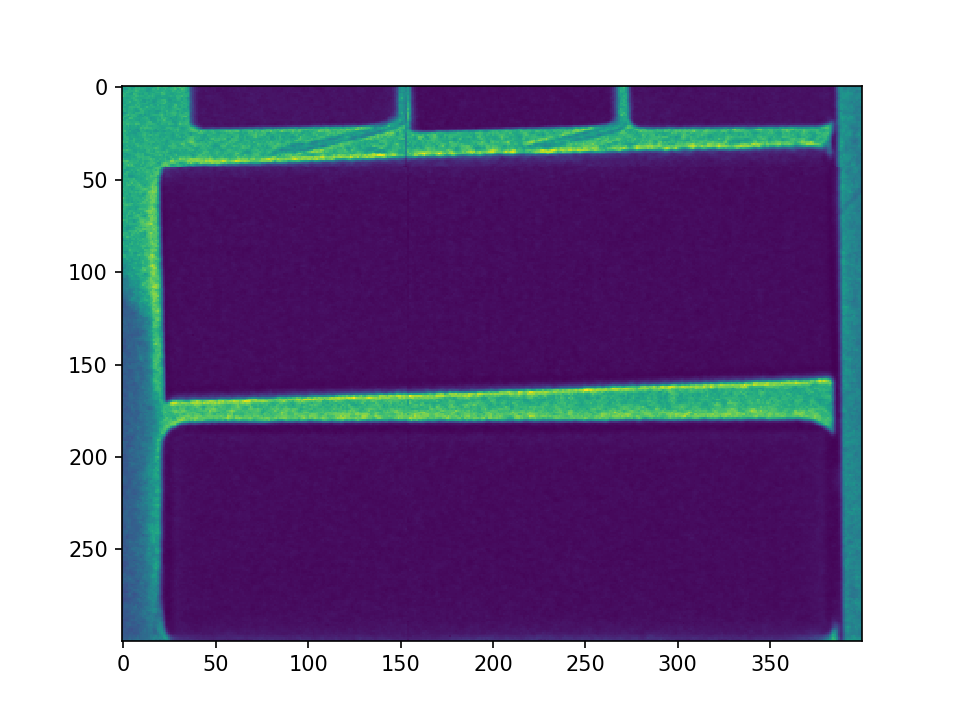

In [22]:
plt.figure()
plt.imshow(sample_image[:,:,i]/ob_image[:,:,i])

trans_image = np.zeros([300,400,155])
for i in range(0,155):
    dose = np.median(ob_image[10:20,10:20,i])/np.median(sample_image[10:20,10:20,i])
    trans_image[:,:,i] = sample_image[:,:,i]/ob_image[:,:,i]*dose

<IPython.core.display.Javascript object>


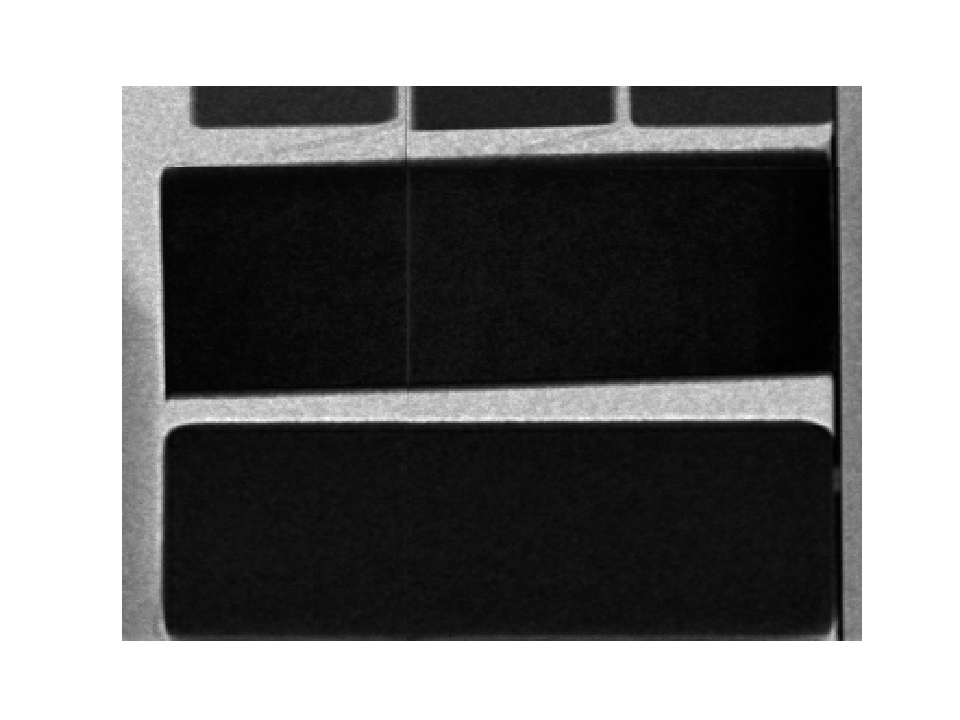

In [23]:
plt.figure()
plt.imshow(trans_image[:,:,70],cmap='gray')
plt.axis('off')
plt.savefig('transmission_lsp.pdf')

<IPython.core.display.Javascript object>


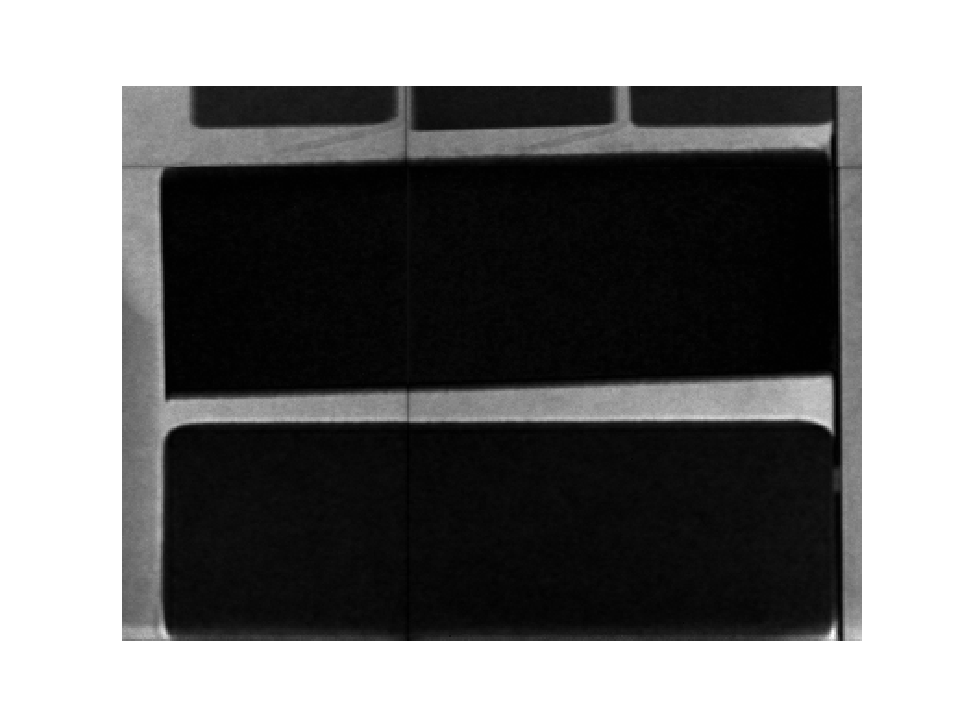

In [24]:
plt.figure()
plt.imshow(sample_image[:,:,70], cmap='gray')
plt.axis('off')
plt.savefig('sample_lsp.pdf')

In [25]:
sp=np.zeros(156)
for i in range(0,155):
    sp[i] = np.median(trans_image[37,254,i])

<IPython.core.display.Javascript object>


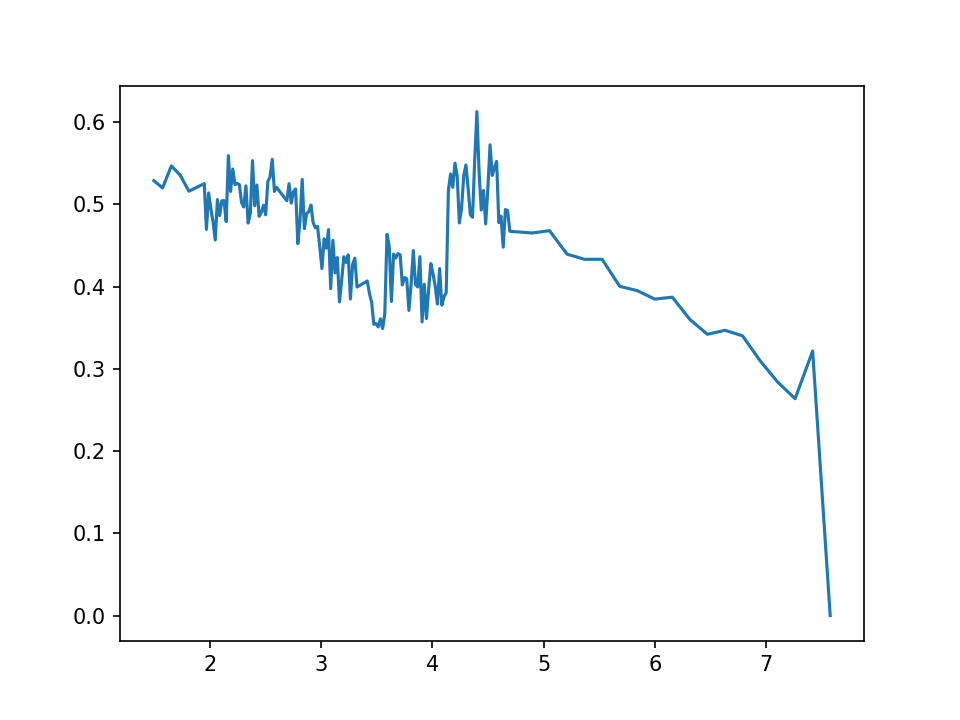

In [26]:
plt.figure()
plt.plot(mylambda_bin, sp)

[86, 122]


<IPython.core.display.Javascript object>


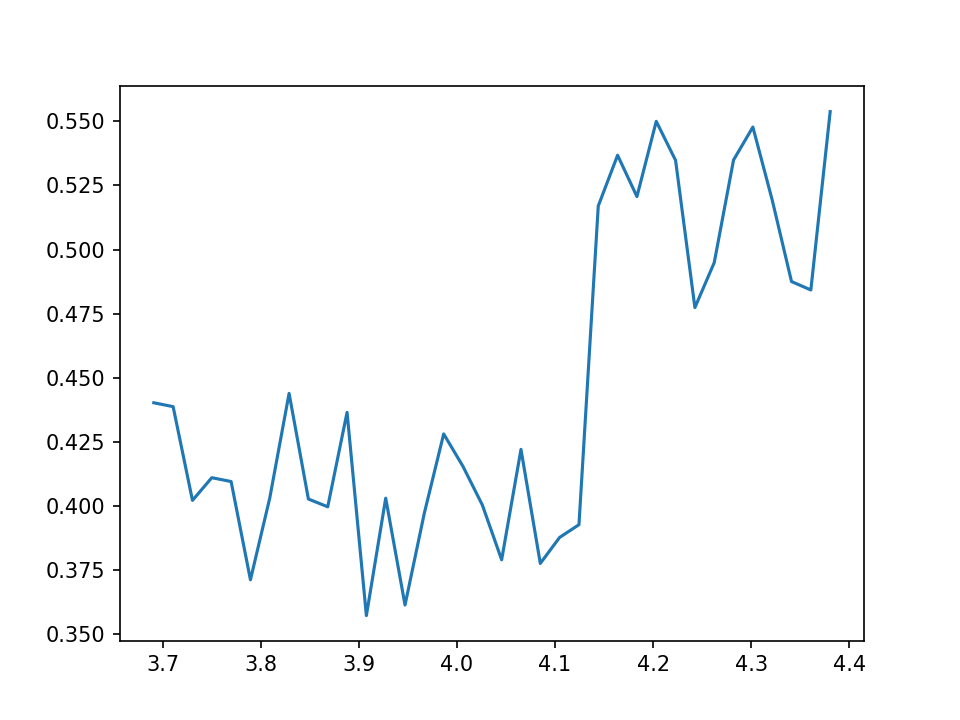

104


<IPython.core.display.Javascript object>


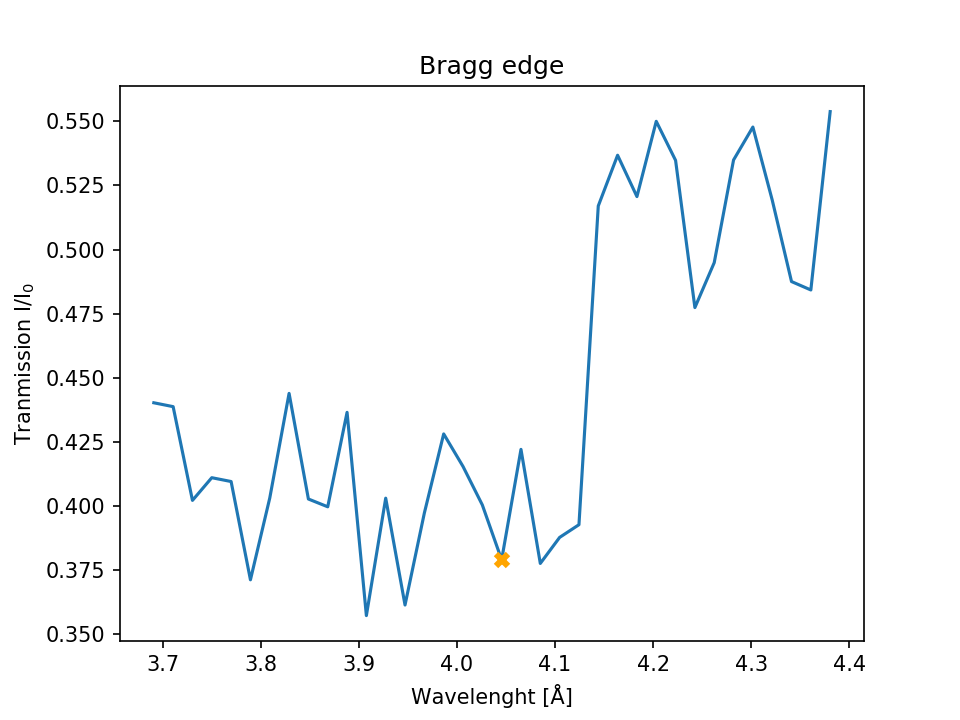

<IPython.core.display.Javascript object>


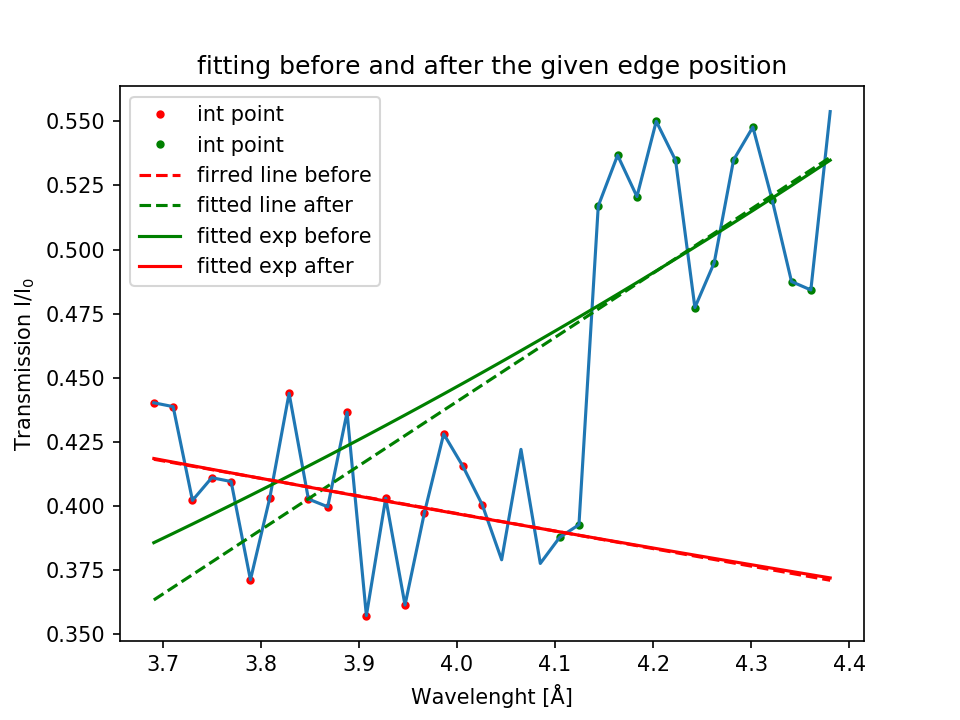

True


<IPython.core.display.Javascript object>


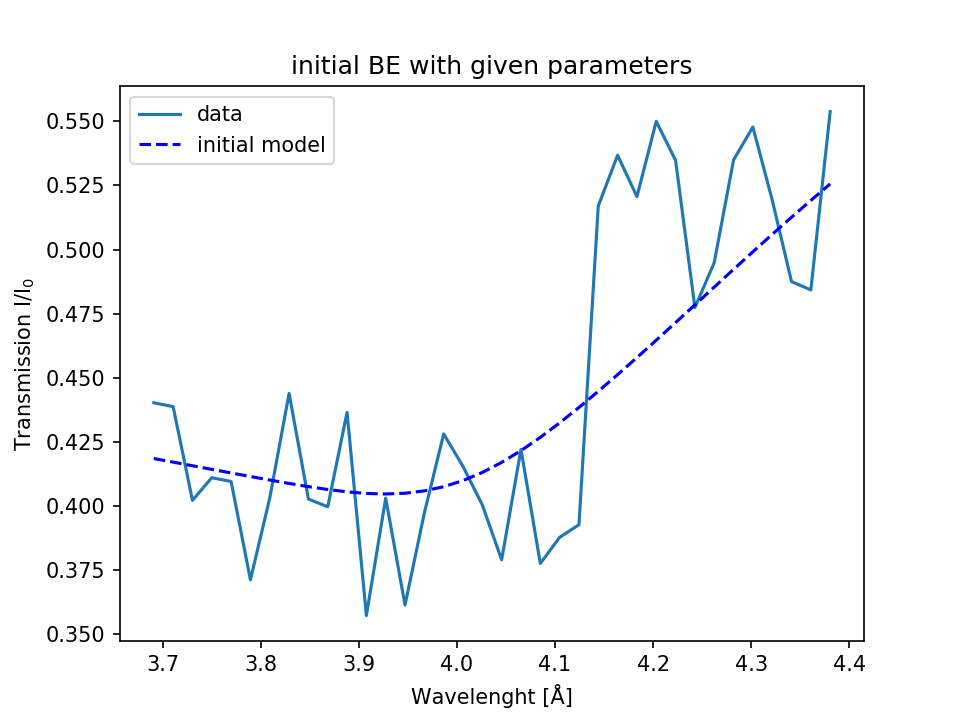

[[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 19
    # data points      = 36
    # variables        = 7
    chi-square         = 0.01946163
    reduced chi-square = 6.7109e-04
    Akaike info crit   = -256.821866
    Bayesian info crit = -245.737234
[[Variables]]
    t0:                 4.13582716 (init = 4.134827)
    alpha:              7.5380e-04 (init = 0.0007537967)
    sigma:              0.00609313 (init = 0.006021246)
    a1:                 0.05783434 (init = 0.2481713)
    a2:                 0.13945570 (init = 0.09526008)
    a5:                 0.17410590 (init = -0.06540054)
    a6:                 0.03372858 (init = 0.09077757)
    bool_transmission: -inf (fixed)

None
bool value, Boolean for whether error bars were estimated by fit. False
None


<IPython.core.display.Javascript object>


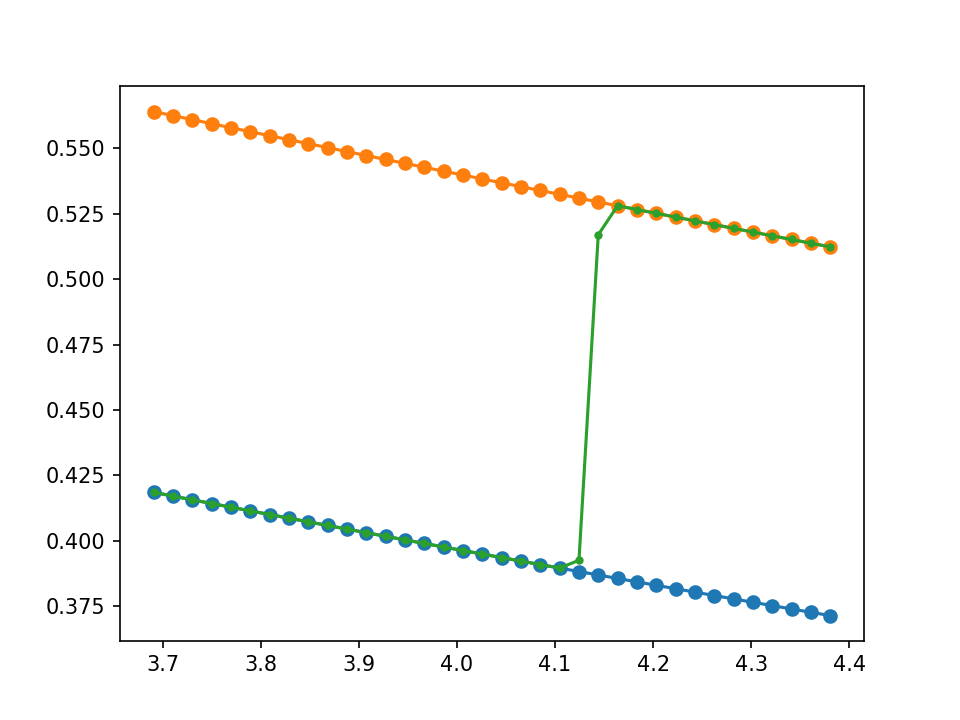

<IPython.core.display.Javascript object>


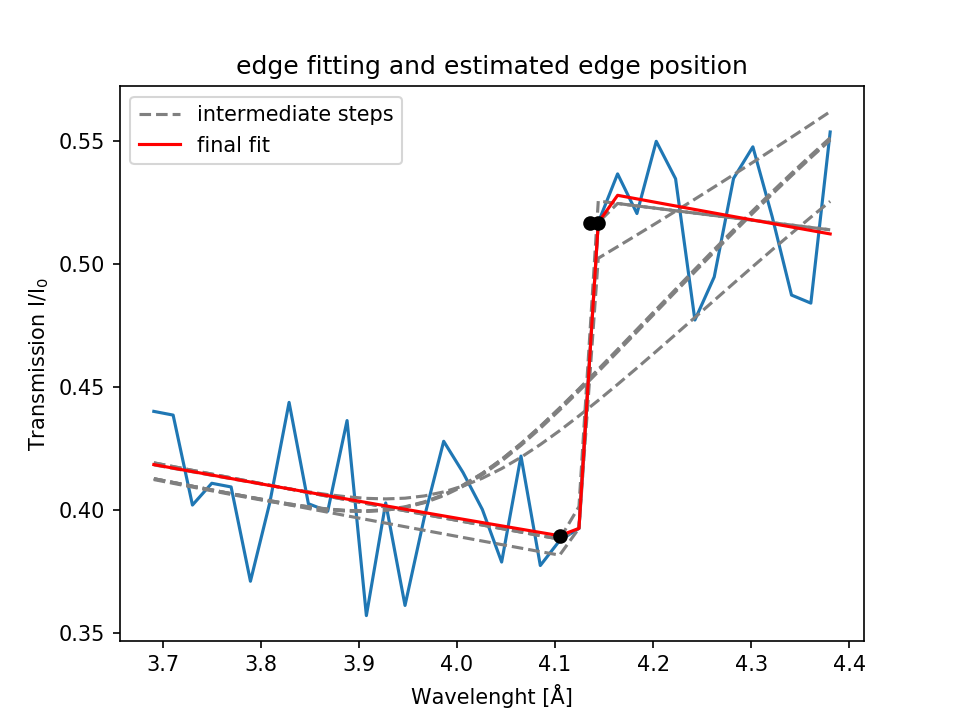

CPU times: user 367 ms, sys: 4.19 ms, total: 371 ms
Wall time: 362 ms


In [28]:
%%time
myrange =[]
myrange.append(find_nearest(mylambda_bin, 3.7))
myrange.append(find_nearest(mylambda_bin, 4.4))
print(myrange)

plt.figure()
plt.plot(mylambda_bin[myrange[0]:myrange[1]], sp[myrange[0]:myrange[1]])

est_sigma = 0.1
est_alpha = 0.1
est_pos = find_nearest(mylambda_bin, 4.05)
print(est_pos)
ris = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(sp, myrange, mylambda_bin, est_pos, est_sigma, est_alpha, False, False, False, True)
# t_edg = ris['t0']
# print(t_edg)

This is an example how to create a mask

<IPython.core.display.Javascript object>


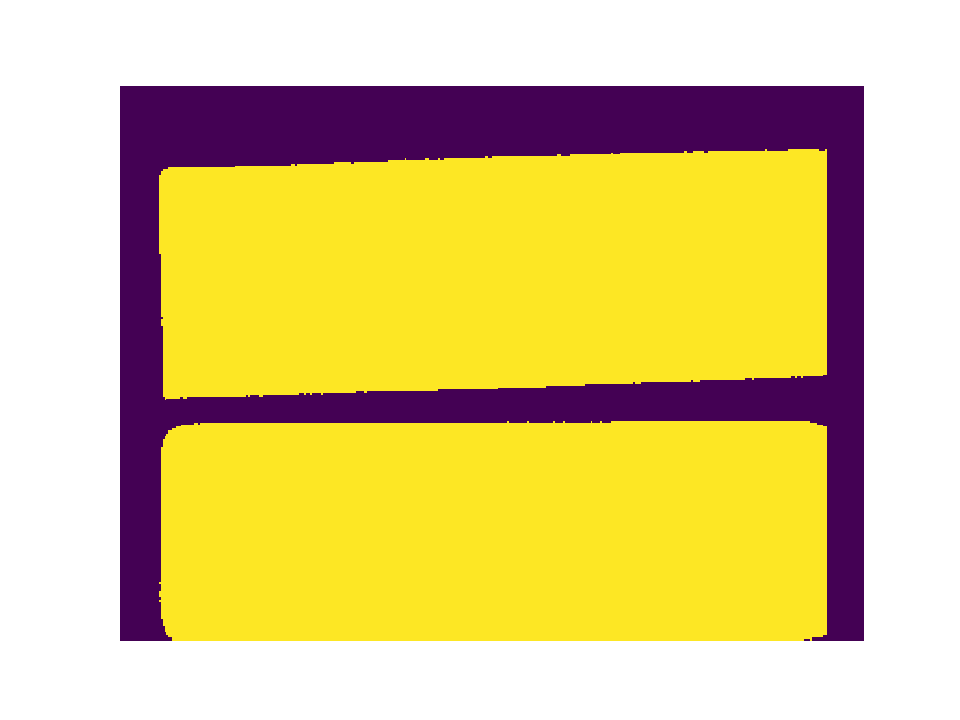

(-0.5, 399.5, 299.5, -0.5)

In [38]:
# This in an example how to create the mask
ob = io.imread(pathob+'/'+files_ob[0])
np.shape(ob)

ob_image = np.zeros([300,400,155])
sample_image = np.zeros([300,400,155])
np.shape(ob_image)

for i in range(0,155):
    ob_image[:,:,i] = io.imread(pathob+'/'+files_ob[i])
    sample_image[:,:,i] = io.imread(pathdata+'/'+files_sample[i])


trans_image = np.zeros([300,400,155])
for i in range(0,155):
    dose = np.median(ob_image[10:20,10:20,i])/np.median(sample_image[10:20,10:20,i])
    trans_image[:,:,i] = sample_image[:,:,i]/ob_image[:,:,i]*dose

mymask = trans_image[:,:,70]<0.5

mymask[:28,:] = False
mymask[:,380:] = False

plt.figure()
plt.imshow(mymask)
plt.axis('off')
plt.axis('tight')
# io.imsave('mymask.tif', mymask+0)


# plt.savefig('mask_lsp.pdf')

# print(np.sum(mymask))

# othermask = trans_image[:,:,70]<0.5
# othermask[:40,:] = False
# othermask[:,380:] = False
# plt.figure()
# plt.imshow(othermask)


# # plt.figure()
# # plt.imshow(othermask!=mymask)

# little_mask = othermask!=mymask
# plt.figure()
# plt.imshow(little_mask)

18
[ 0 35]
36 2 36


<IPython.core.display.Javascript object>


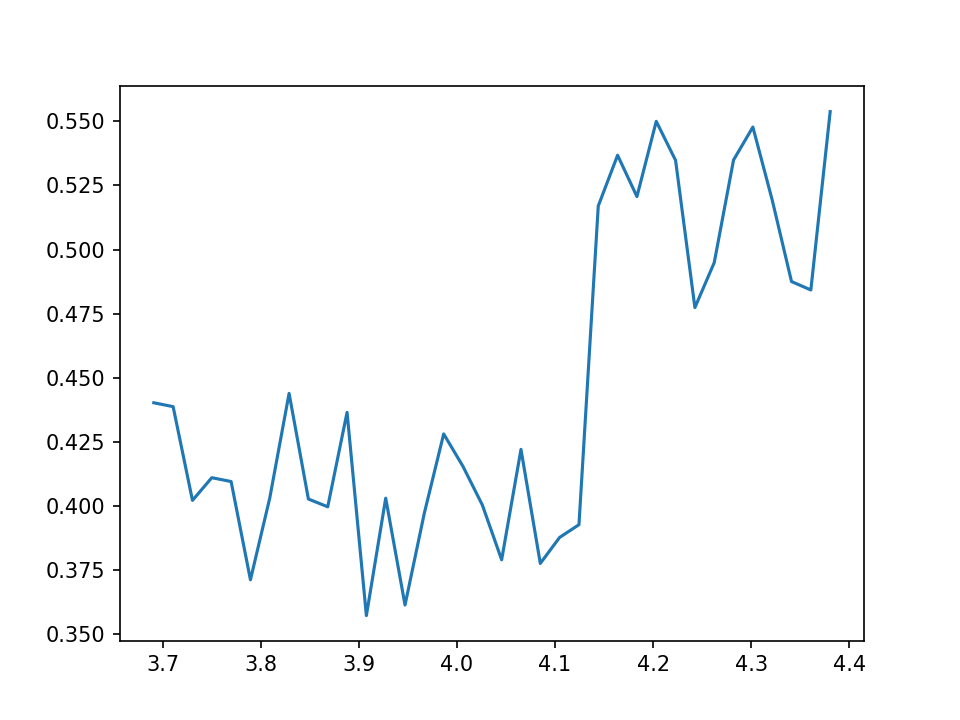

<IPython.core.display.Javascript object>


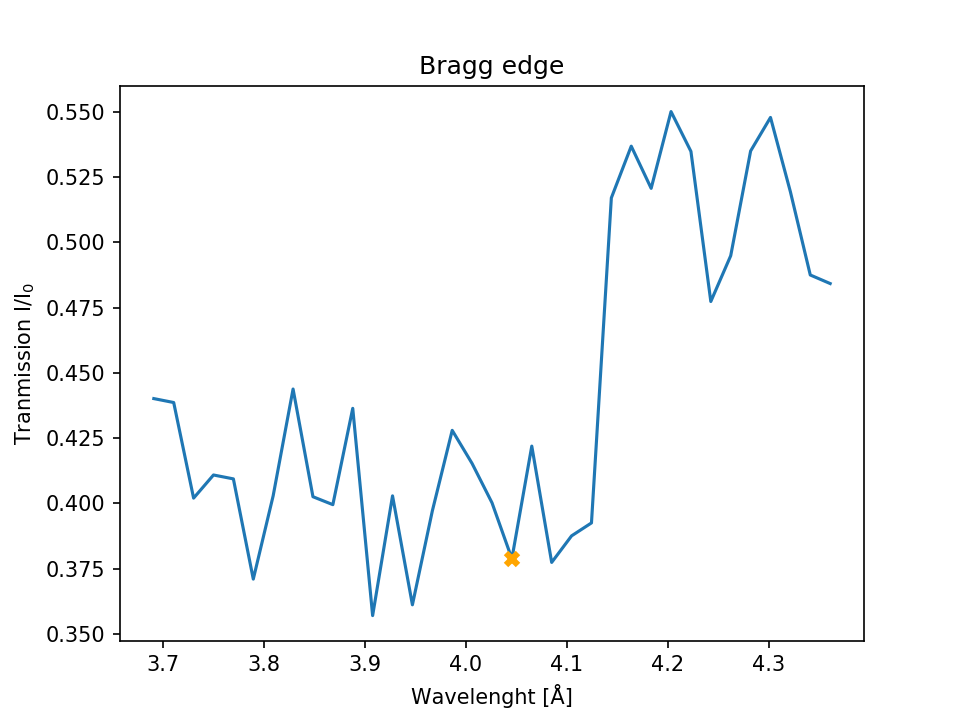

<IPython.core.display.Javascript object>


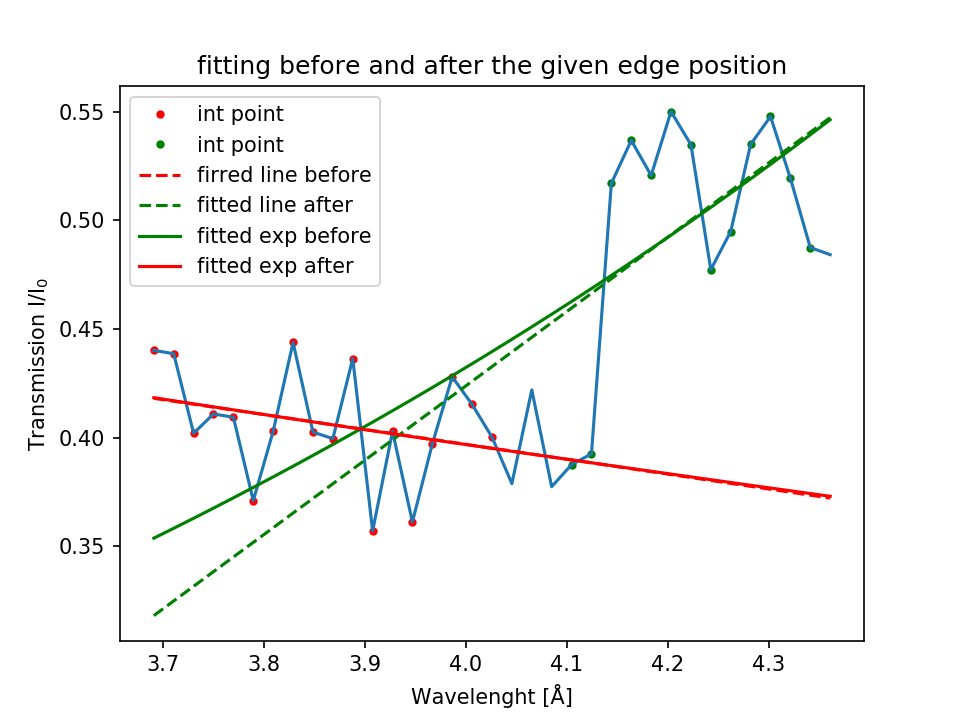

True


<IPython.core.display.Javascript object>


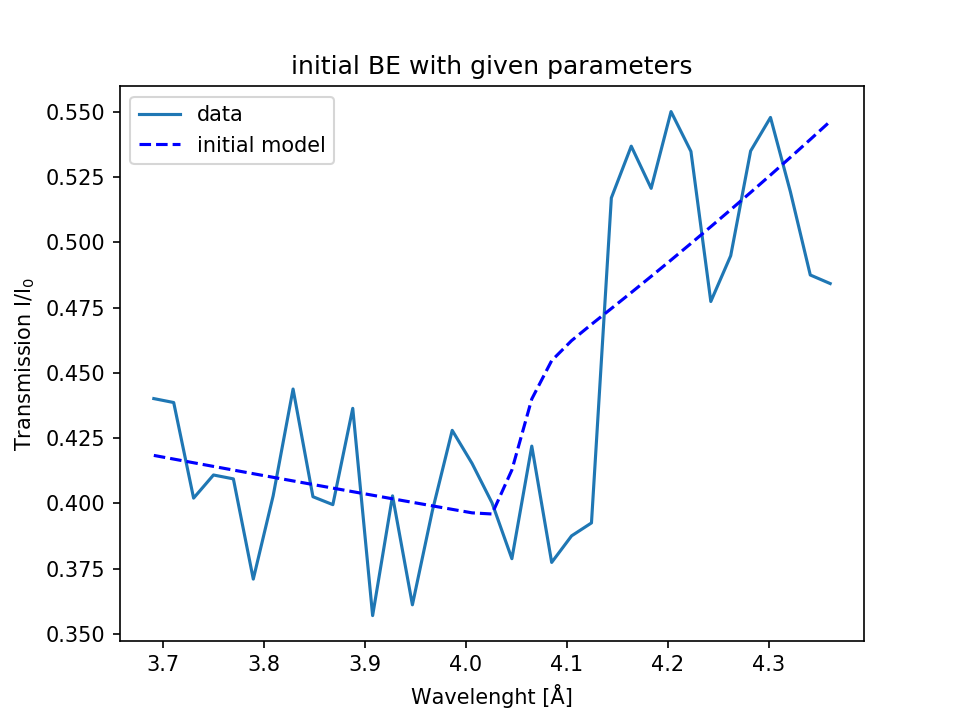

[[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 8
    # data points      = 35
    # variables        = 7
    chi-square         = 0.01703421
    reduced chi-square = 6.0836e-04
    Akaike info crit   = -252.975796
    Bayesian info crit = -242.088360
[[Variables]]
    t0:                 4.13710373 +/- 0.00737236 (0.18%) (init = 4.136045)
    alpha:              9.0207e-04 +/- 672894.546 (74594270527.33%) (init = 0.001039599)
    sigma:              0.00664472 +/- 0.00627214 (94.39%) (init = 0.006433189)
    a1:                -0.87069835 +/- 1.14230027 (131.19%) (init = -0.5012318)
    a2:                 0.35905677 +/- 0.26750128 (74.50%) (init = 0.2730051)
    a5:                 1.10265287 +/- 1.21221242 (109.94%) (init = 0.7046055)
    a6:                -0.18587621 +/- 0.28707291 (154.44%) (init = -0.0923534)
    bool_transmission: -inf (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C

/home/carminati_c/git/ToFImaging/scripts/AdvancedBraggEdgeFitting_v2.py:61: RuntimeWarning: invalid value encountered in multiply
  edge = 0.5*(term3(t,t0,sigma) - term4(t,t0,alpha,sigma)* term5(t,t0,alpha,sigma))


<IPython.core.display.Javascript object>


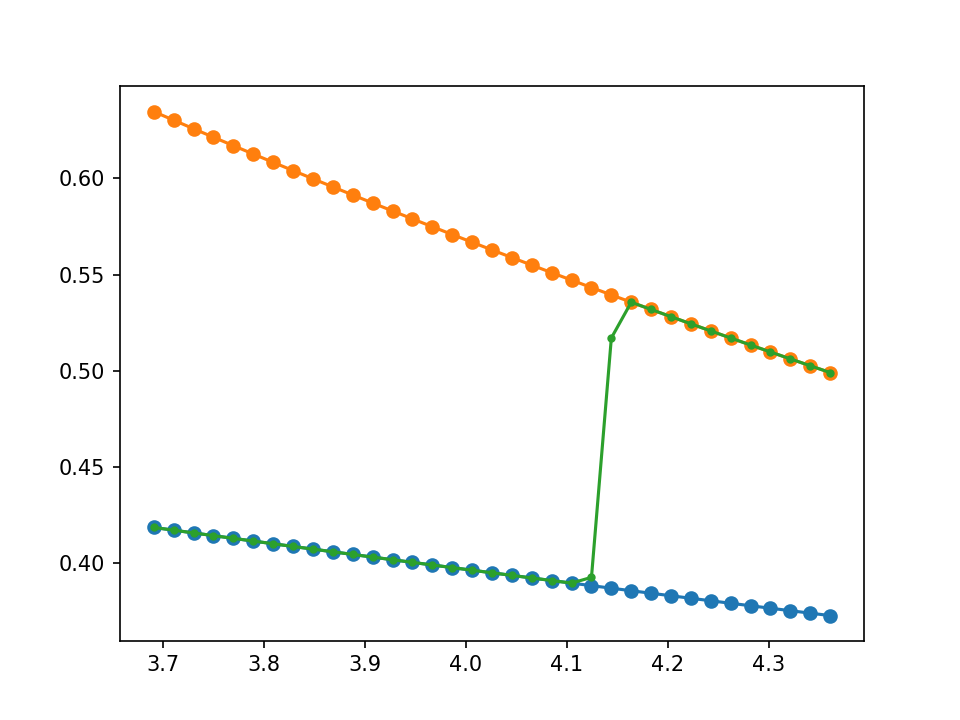

<IPython.core.display.Javascript object>


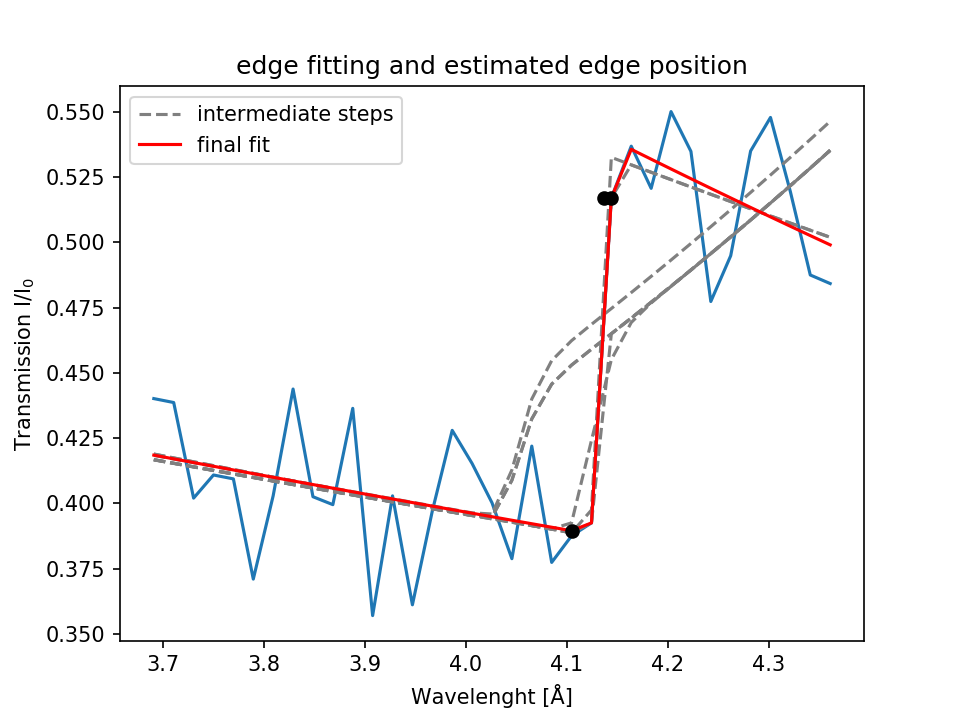

first iteration:  [[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 4
    # data points      = 35
    # variables        = 2
    chi-square         = 0.04644589
    reduced chi-square = 0.00140745
    Akaike info crit   = -227.868539
    Bayesian info crit = -224.757843
[[Variables]]
    t0:                 4.045542 (fixed)
    alpha:              0.01 (fixed)
    sigma:              0.01 (fixed)
    a1:                 3.45469150 +/- 0.01937817 (0.56%) (init = 3.434232)
    a2:                -0.6488869 (fixed)
    a5:                -3.195352 (fixed)
    a6:                 0.81582606 +/- 0.00760516 (0.93%) (init = 0.820256)
    bool_transmission: -inf (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a1, a6) = -0.677

second iteration:  [[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 3
    # data points      = 35
 

<IPython.core.display.Javascript object>


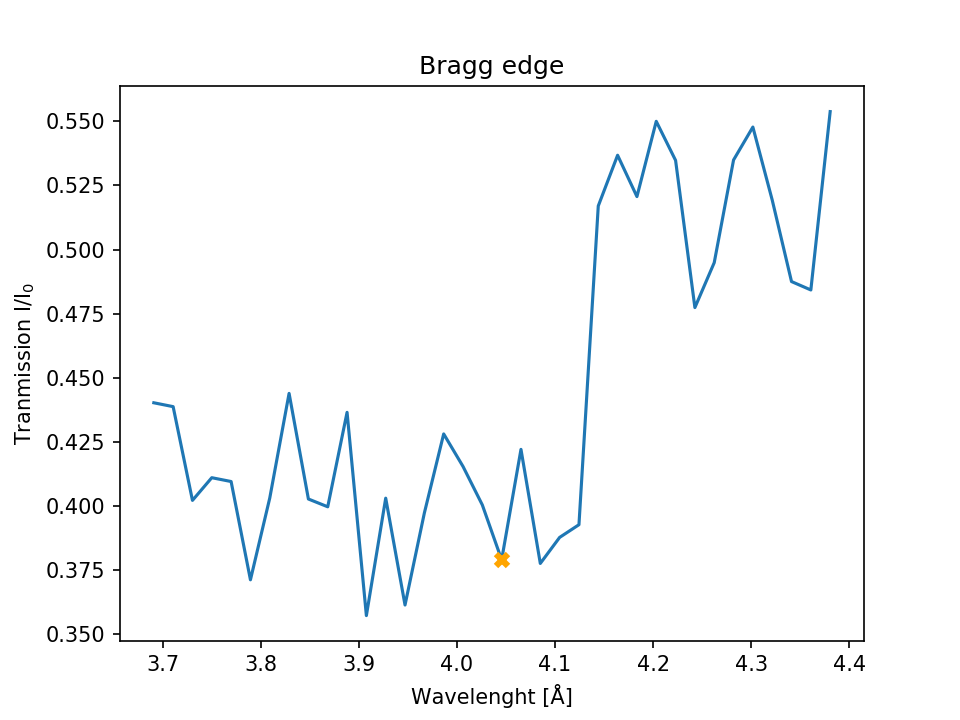

<IPython.core.display.Javascript object>


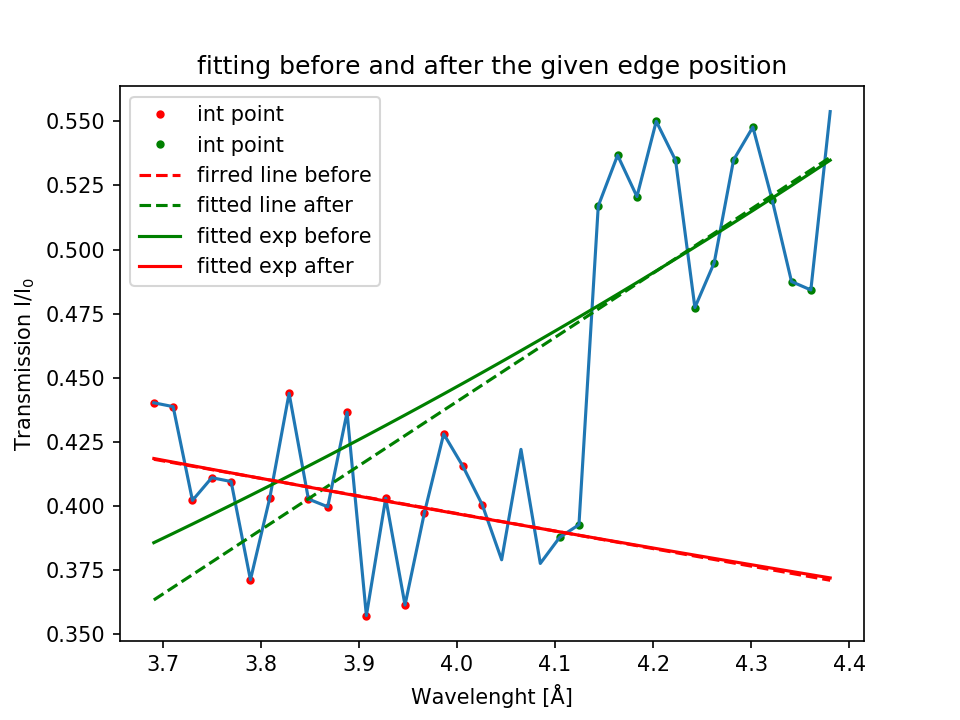

True


<IPython.core.display.Javascript object>


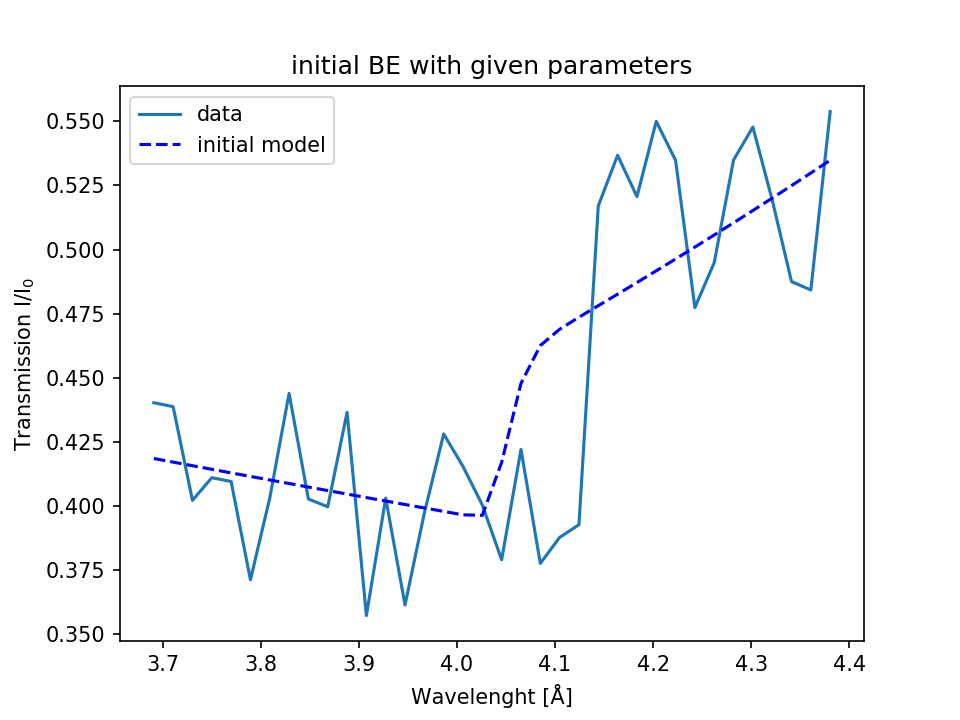

[[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 17
    # data points      = 36
    # variables        = 7
    chi-square         = 0.01946163
    reduced chi-square = 6.7109e-04
    Akaike info crit   = -256.821866
    Bayesian info crit = -245.737234
[[Variables]]
    t0:                 4.13582741 (init = 4.13504)
    alpha:              6.9766e-04 (init = 0.001001463)
    sigma:              0.00609318 (init = 0.005935574)
    a1:                 0.05775527 (init = 0.2377265)
    a2:                 0.13947421 (init = 0.09768867)
    a5:                 0.17419438 (init = -0.03065727)
    a6:                 0.03370766 (init = 0.08199699)
    bool_transmission: -inf (fixed)

None
bool value, Boolean for whether error bars were estimated by fit. False
None


/home/carminati_c/anaconda3/lib/python3.7/site-packages/lmfit/minimizer.py:767: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/carminati_c/anaconda3/lib/python3.7/site-packages/lmfit/minimizer.py:774: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))


<IPython.core.display.Javascript object>


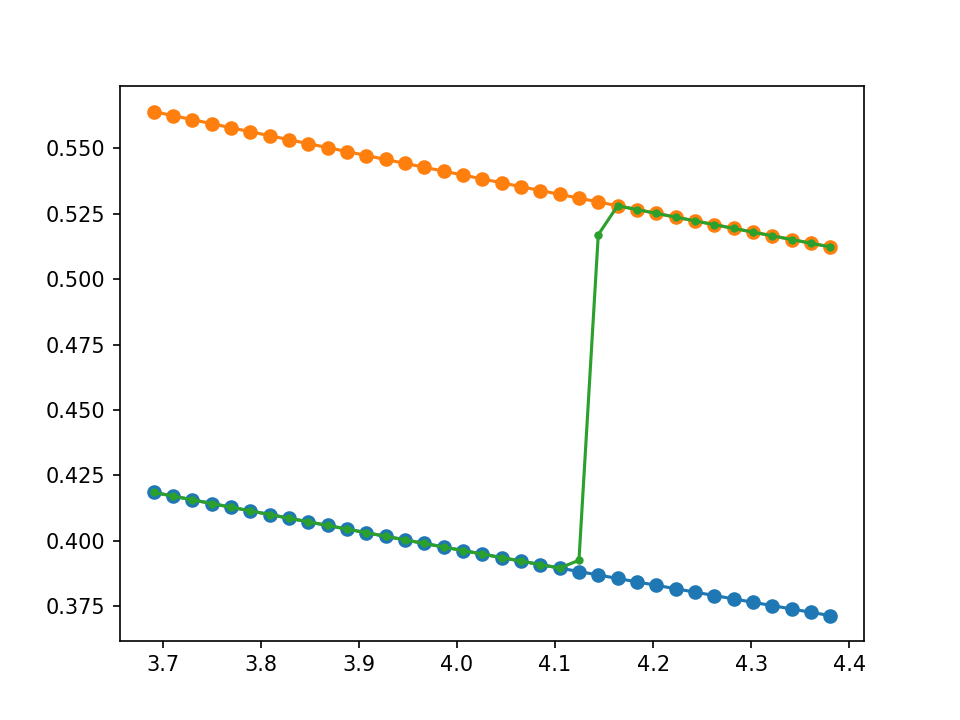

<IPython.core.display.Javascript object>


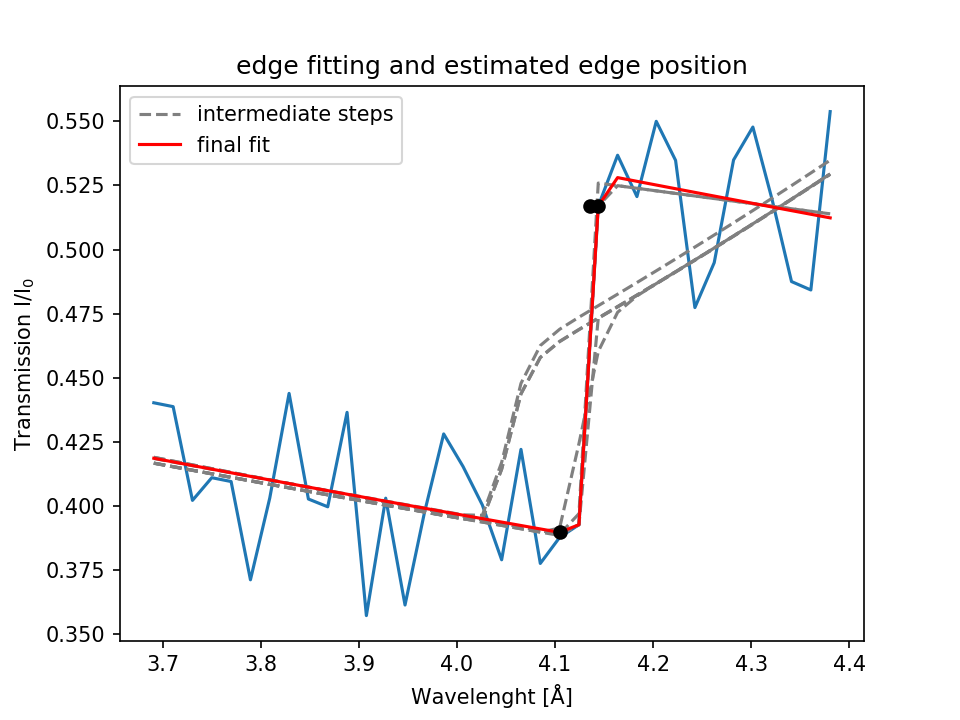

first iteration:  [[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 4
    # data points      = 36
    # variables        = 2
    chi-square         = 0.04880856
    reduced chi-square = 0.00143555
    Akaike info crit   = -233.721270
    Bayesian info crit = -230.554232
[[Variables]]
    t0:                 4.045542 (fixed)
    alpha:              0.01 (fixed)
    sigma:              0.01 (fixed)
    a1:                 2.71612539 +/- 0.01882119 (0.69%) (init = 2.705736)
    a2:                -0.4748279 (fixed)
    a5:                -2.466855 (fixed)
    a6:                 0.64460208 +/- 0.00755387 (1.17%) (init = 0.6461968)
    bool_transmission: -inf (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a1, a6) = -0.663

second iteration:  [[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 3
    # data points      = 36


In [37]:
%%time

est_sigma = 0.01
est_alpha = 0.01
est_pos = find_nearest(mylambda_bin[myrange[0]:myrange[1]], 4.05)
print(est_pos)
small_range = np.array([0, myrange[1]-myrange[0]-1])
small_lambda = mylambda_bin[myrange[0]:myrange[1]]
print(small_range)
print(len(small_lambda), len(small_range), len(sp[myrange[0]:myrange[1]]))

plt.figure()
plt.plot(small_lambda,sp[myrange[0]:myrange[1]] )

AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(sp[myrange[0]:myrange[1]], small_range, small_lambda, est_pos, est_sigma, est_alpha, True, False, False, True)

est_pos = find_nearest(mylambda_bin, 4.05)
print(est_pos)
print(myrange)
AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(sp, myrange, mylambda_bin, est_pos, est_sigma, est_alpha, True, False, False, True)


edge_position = np.zeros(np.shape(mymask))
edge_width = np.zeros(np.shape(mymask))



# print(np.shape(edge_position))

# for i in range(0, np.shape(mymask)[0]):
    
#     for j in range(0, np.shape(mymask)[1]):
        
#         if (mymask[i,j]):
# #             print(i,j,' ciao')
#             # extract the signal
#             mysignal = np.zeros(myrange[1]-myrange[0])
            
    
#             for ind in range(myrange[0],myrange[1]):
#                 mysignal[ind-myrange[0]] = np.median(trans_image[i,j,ind])
            
#             try:
#                 edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, False, False, False, True)

#                 edge_position[i,j] = edge_fit['t0']
#                 if (len(edge_fit['pos_extrema'])==2):
#                     edge_width[i,j] = small_lambda[edge_fit['pos_extrema'][1]]-small_lambda[edge_fit['pos_extrema'][0]]
#                 else:
#                     edge_width[i,j]=-2.0
#             except:
#                 print("Unexpected error at :", i, j)
#                 edge_position[i,j]= -2.0
#                 edge_width[i,j]=-2.0
                

                    


    

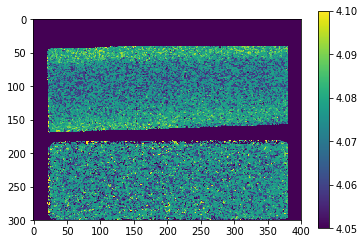

In [12]:

test = np.load('edge_position.npy')
plt.figure()
plt.imshow(test,vmin=4.05, vmax=4.10)
plt.colorbar()

In [14]:
test_little = np.load('edge_position_little.npy')
fits.writeto('edge_pos.fits',test)


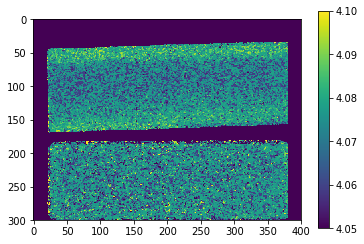

In [15]:
plt.figure()
plt.imshow(test_little+test,vmin=4.05, vmax=4.10)
plt.colorbar()

np.save("edge_position_tot.npy", test_little+test)

In [16]:
EP = np.load("edge_position_tot.npy")

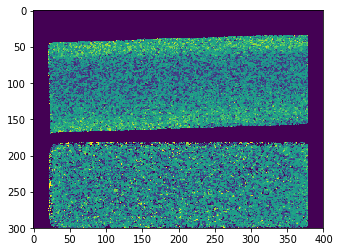

In [17]:
plt.figure()
plt.imshow(EP,vmin=4.05, vmax=4.10)

In [18]:
sum(sum(n < 0 for n in EP))

46

In [19]:
#     t0:                 4.07855978 +/- 15750.9720 (386189.56%) (init = 4.076283)
#     alpha:              8.8506e-04 +/- 26892.9752 (3038556174.03%) (init = 0.007669497)
#     sigma:              2.0660e-04 +/- 62396.2248 (30201102063.85%) (init = 0.0001408172)
#     a1:                 1.94456283 +/- 1.28224664 (65.94%) (init = 0.9776328)
#     a2:                -0.03410872 +/- 0.30144455 (883.78%) (init = 0.1905023)
#     a5:                -4.32338756 +/- 1.99813278 (46.22%) (init = -3.757007)
#     a6:                 1.29564172 +/- 0.49946988 (38.55%) (init = 1.176675)
        
est_alpha = 0.1
est_sigma = 0.1
a1 = 1.94456283
a2 = -0.03410872
a5 = -4.32338756
a6 = 1.29564172
est_pos = find_nearest(mylambda_bin[myrange[0]:myrange[1]], 4.07)

missing_edges = np.zeros(np.shape(mymask))
print(est_pos)

print(myrange)
print(small_range)

# 37,254

# for ind in range(myrange[0],myrange[1]):
#     mysignal[ind-myrange[0]] = np.median(trans_image[37,254,ind])

# plt.figure()
# plt.plot(small_lambda, mysignal)

# edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, True, False, False, True)

for i in range(0, np.shape(mymask)[0]):
    
    for j in range(0, np.shape(mymask)[1]):
        
        if (EP[i,j]==-2):
            print(i,j,' ciao')
            # extract the signal
            mysignal = np.zeros(myrange[1]-myrange[0])
            
    
            for ind in range(myrange[0],myrange[1]):
                mysignal[ind-myrange[0]] = np.median(trans_image[i,j,ind])
            
            try:
                edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, False, False, False, True)

                missing_edges[i,j] = edge_fit['t0']
#                 if (len(edge_fit['pos_extrema'])==2):
#                     edge_width[i,j] = small_lambda[edge_fit['pos_extrema'][1]]-small_lambda[edge_fit['pos_extrema'][0]]
#                 else:
#                     edge_width[i,j]=-2.0
            except:
                print("Unexpected error at :", i, j)
                missing_edges[i,j]= -2.0
#                 edge_width[i,j]=-2.0
                

20
[88, 125]
[ 0 36]
37 254  ciao
43 219  ciao


/home/carminati_c/anaconda3/lib/python3.7/site-packages/lmfit/minimizer.py:767: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/carminati_c/anaconda3/lib/python3.7/site-packages/lmfit/minimizer.py:774: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))


47 205  ciao
53 187  ciao
53 339  ciao
56 240  ciao
66 136  ciao
76 79  ciao
82 359  ciao
88 21  ciao
89 357  ciao
90 138  ciao
101 299  ciao
106 199  ciao
117 117  ciao
125 193  ciao
153 342  ciao
154 84  ciao
161 182  ciao
163 188  ciao
163 189  ciao
164 89  ciao
181 265  ciao
Unexpected error at : 181 265
181 320  ciao
182 225  ciao
182 251  ciao
213 294  ciao
216 140  ciao
217 91  ciao
217 135  ciao
222 35  ciao
223 68  ciao
224 32  ciao
238 23  ciao
244 228  ciao
Unexpected error at : 244 228
246 336  ciao
250 154  ciao
250 255  ciao
261 222  ciao
262 257  ciao
263 88  ciao
264 67  ciao
284 215  ciao
287 361  ciao
291 247  ciao
298 371  ciao


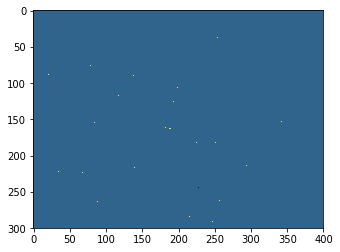

In [20]:
plt.figure()
plt.imshow(missing_edges)

In [21]:
est_alpha = 0.09
est_sigma = 0.09
a1 = 1.94456283
a2 = -0.03410872
a5 = -4.32338756
a6 = 1.29564172
est_pos = find_nearest(mylambda_bin[myrange[0]:myrange[1]], 4.05)

# missing_edges = np.zeros(np.shape(mymask))
print(est_pos)

print(myrange)
print(small_range)



for i in range(0, np.shape(mymask)[0]):
    
    for j in range(0, np.shape(mymask)[1]):
        
        if (missing_edges[i,j]==-2):
            print(i,j,' ciao')
            # extract the signal
            mysignal = np.zeros(myrange[1]-myrange[0])
            
    
            for ind in range(myrange[0],myrange[1]):
                mysignal[ind-myrange[0]] = np.median(trans_image[i,j,ind])
            
            try:
                edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, False, False, False, True)

                missing_edges[i,j] = edge_fit['t0']
#                 if (len(edge_fit['pos_extrema'])==2):
#                     edge_width[i,j] = small_lambda[edge_fit['pos_extrema'][1]]-small_lambda[edge_fit['pos_extrema'][0]]
#                 else:
#                     edge_width[i,j]=-2.0
            except:
                print("Unexpected error at :", i, j)
                missing_edges[i,j]= -2.0
#                 edge_width[i,j]=-2.0

18
[88, 125]
[ 0 36]
181 265  ciao
244 228  ciao


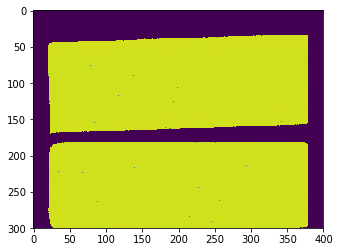

In [22]:
plt.figure()
plt.imshow(missing_edges+EP)

In [23]:
updated_EP = np.zeros(np.shape(mymask))

for i in range(0, np.shape(mymask)[0]):
    for j in range(0, np.shape(mymask)[1]):
        if (EP[i,j]!=-2):
            updated_EP[i,j]= EP[i,j]
        else:
            updated_EP[i,j]= missing_edges[i,j]
# updated_EP = EP[EP!=-2]
# updated_EP = missing_edges[EP==-2]

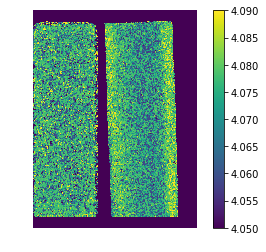

In [63]:
plt.figure()
plt.imshow(np.rot90(updated_EP,3),vmin=4.05, vmax=4.09)
plt.axis('off')
plt.colorbar()
plt.savefig('LSP_manuel_model.pdf')

In [ ]:
np.save('edge_positions_all.npy', updated_EP)

In [ ]:
fits.writeto('edge_pos_all.fits',updated_EP)